# Exploratory Data Analysis

### Topic_1-1. Netflix Movies and TV Shows

#### By. Gukhwan Hyun


About this Dataset: 
  * Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.
    * Dataset available at [here](https://www.kaggle.com/shivamb/netflix-shows)

# Import dataset from Kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle    
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download shivamb/netflix-shows
! unzip netflix-shows.zip

# Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno

# Load the dataset

In [3]:
dataset = pd.read_csv('netflix_titles.csv')
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Preprocessing
  * df.info()
  * df.shape
  * df.head(), df.tail()
  * df.describe()
  * df.dtypes
  * df['column'].value_counts()


In [4]:
netflix = dataset.copy()
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## What we know so far?
  * All except release_year have string dtype
  * Missing values in director, cast, country, date_added, rating, duration
  * "date_added" --> Convert to Datetime format and parse it
  * show_id is the same as index --> may be not necessary?

## Handling NA values

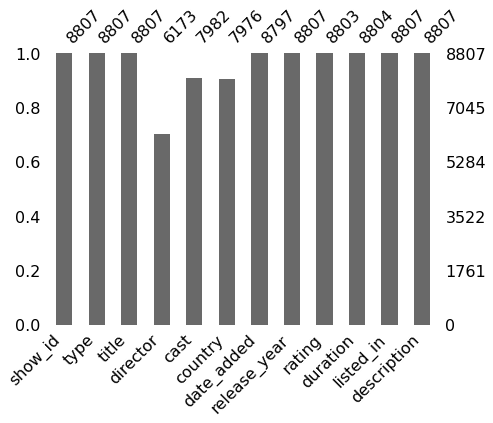

In [6]:
missingno.bar(netflix, figsize=(7,5));

In [7]:
# this data cannot be guessed or known
netflix.dropna(subset=['date_added'], inplace=True)

In [8]:
netflix.director.fillna('Not Available', inplace=True)
netflix.cast.fillna('Not Available', inplace=True)
netflix.country.fillna('Not Available', inplace=True)
netflix.rating.fillna('Not Available', inplace=True)
netflix.duration.fillna('Not Available', inplace=True)

In [9]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8797 non-null   object
 9   duration      8797 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.4+ KB


## Data Inspections

In [10]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
col_names = netflix.columns

for col in col_names:
  if col not in ['show_id', 'title', 'date_added', 'release_year', 'description']:
    print(col, netflix[col].value_counts(), sep='\n')
    print('-'*100)

type
Movie      6131
TV Show    2666
Name: type, dtype: int64
----------------------------------------------------------------------------------------------------
director
Not Available             2624
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
                          ... 
James Brown                  1
Agnidev Chatterjee           1
Shadab Khan                  1
Kristine Stolakis            1
Ramesh Sippy                 1
Name: director, Length: 4529, dtype: int64
----------------------------------------------------------------------------------------------------
cast
Not Available                                                                                                                                                                   825
David Attenborough                                                                                                                                            

From the output above, we can see that director, cast, country, listed_in columns needs to be parsed

## Parsing
  * director
  * cast
  * country
  * listed_in
  * date_added : datetime parse

### "date_added"
  * data cleaning to make time readable --> one of the reason which data analyst is needed

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'].str.strip(), format="%B %d, %Y")

In [ ]:
netflix.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


* Check for data distrubutions
  * heavily biased to right (recent year)

In [ ]:
netflix['release_year'].hist();

In [ ]:
fig = px.histogram(netflix, x="release_year")
fig.update_layout(bargap=0.2)
fig.show();

In [ ]:
# Year that movie was added to Netflix server
netflix['date_added'].hist();

In [ ]:
fig = px.histogram(netflix, x="date_added")
fig.update_layout(bargap=0.3)
fig.show();

### Extract Year, Month, Day from "date_added"
  * To see any patterns to adding the movies, TV Shows --> Not much

In [ ]:
# .dt : accessing datetime method
netflix["date_added_year"] = netflix['date_added'].dt.year
netflix["date_added_month"] = netflix['date_added'].dt.month 
netflix["date_added_day"] = netflix['date_added'].dt.day

In [ ]:
fig = px.histogram(netflix, x="date_added", color='date_added_month')
fig.update_layout(bargap=0.3)
fig.show();

#### Year-wise
  * Netflix 성장 시기, 영화의 양과의 상관관계?

In [ ]:
fig = px.histogram(netflix, x="date_added_year")
fig.update_layout(bargap=0.3)
fig.show();

#### Month-wise
  * 전반적으로 비슷 

In [ ]:
fig = px.histogram(netflix, x="date_added_month")
fig.update_layout(bargap=0.3)
fig.show();

#### Day-wise
  * First day of the month adds the most! --> **First insight!**

In [ ]:
fig = px.histogram(netflix, x="date_added_day")
fig.update_layout(bargap=0.3)
fig.show();

### Create a Parsing function

In [12]:
def col_data_parser(col):
  netflix_cpy = netflix.copy()
  col_upper = col.upper()
  
  col_count = pd.concat([netflix_cpy, netflix[col].str.split(",", expand=True)], axis=1)
  
  col_count = col_count.melt(id_vars=['type', 'title'], 
                            value_vars=range(len(netflix[col].str.split(",", expand=True).columns)), 
                            value_name=col_upper)
  
  col_count = col_count[col_count[col_upper].notna()]
  col_count[col_upper] = col_count[col_upper].str.strip()
  col_count.drop(columns='variable', inplace=True)
  
  return col_count

In [13]:
print(col_data_parser('director'),
      col_data_parser('cast'),
      col_data_parser('country'),
      col_data_parser('listed_in'), 
      sep='\n'*2)

           type  ...          DIRECTOR
0         Movie  ...   Kirsten Johnson
1       TV Show  ...     Not Available
2       TV Show  ...   Julien Leclercq
3       TV Show  ...     Not Available
4       TV Show  ...     Not Available
...         ...  ...               ...
95477     Movie  ...    Rusty Cundieff
102654    Movie  ...      Mike Gabriel
103672    Movie  ...  Hiroshi Yamazaki
104274    Movie  ...        James Gunn
111451    Movie  ...         Mark Henn

[9602 rows x 3 columns]

           type                  title           CAST
0         Movie   Dick Johnson Is Dead  Not Available
1       TV Show          Blood & Water     Ama Qamata
2       TV Show              Ganglands  Sami Bouajila
3       TV Show  Jailbirds New Orleans  Not Available
4       TV Show           Kota Factory     Mayur More
...         ...                    ...            ...
417233  TV Show           Black Mirror       Jon Hamm
424110  TV Show        Social Distance    Ayize Ma'at
426030  TV Show     

In [16]:
director_df = col_data_parser('director')
cast_df = col_data_parser('cast')
country_df = col_data_parser('country')
genre_df = col_data_parser('listed_in')

In [17]:
director_df.shape, cast_df.shape, country_df.shape, genre_df.shape

((9602, 3), (64882, 3), (10840, 3), (19303, 3))

# EDA
  * Visualization / Searching for Insight

## Types of contents


In [ ]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

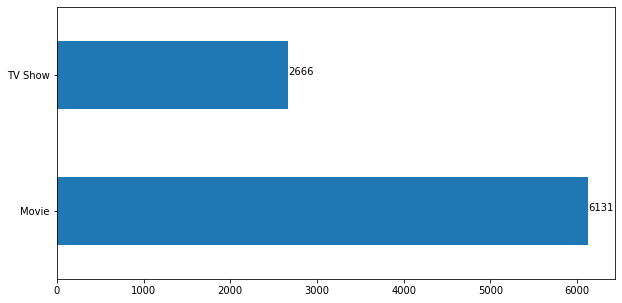

In [18]:
fig = plt.figure(figsize=(10,5))
netflix['type'].value_counts().plot(kind='barh')
for index, value in enumerate(netflix['type'].value_counts().values):
    plt.text(value, index, str(value))

### Country-wise

In [ ]:
fig = px.histogram(netflix, x="date_added_year", color='type')
fig.update_layout(bargap=0.3)
fig.show();

In [ ]:
fig = px.histogram(netflix, x="date_added_month", color='type')
fig.update_layout(bargap=0.3)
fig.show();

In [ ]:
fig = px.histogram(netflix, x="date_added_day", color='type')
fig.update_layout(bargap=0.3)
fig.show();

## Most common director 

In [20]:
director_df['DIRECTOR'].value_counts()[1:11]

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Youssef Chahine        12
Jay Chapman            12
Name: DIRECTOR, dtype: int64

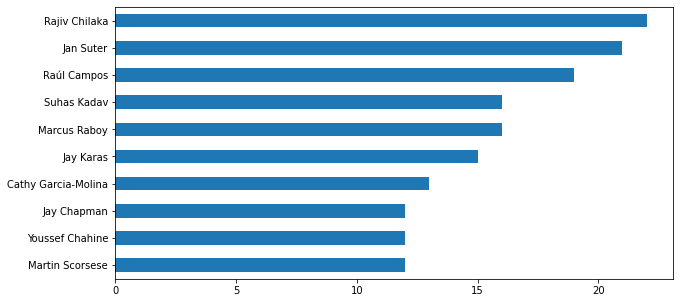

In [21]:
# Top 10
fig = plt.figure(figsize=(10,5))
director_df['DIRECTOR'].value_counts()[1:11].sort_values().plot(kind='barh');

## Most common cast

In [22]:
cast_df['CAST'].value_counts()

Not Available        825
Anupam Kher           43
Shah Rukh Khan        35
Julie Tejwani         33
Naseeruddin Shah      32
                    ... 
Jason Grasl            1
Shweta Pandit          1
Safinaz                1
Linda Gray             1
Armando Hernández      1
Name: CAST, Length: 36404, dtype: int64

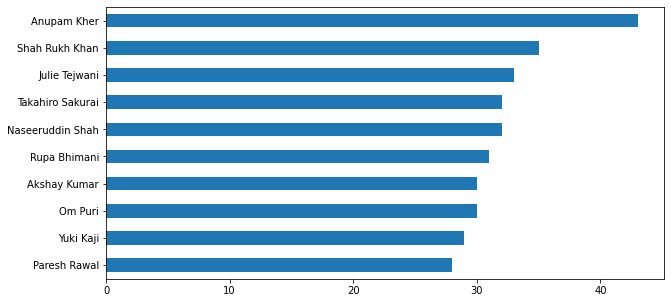

In [23]:
# Top 10
fig = plt.figure(figsize=(10,5))
cast_df['CAST'].value_counts()[1:11].sort_values().plot(kind='barh');

## Most producing country

In [24]:
country_df['COUNTRY'].value_counts()

United States     3684
India             1046
Not Available      830
United Kingdom     805
Canada             445
                  ... 
Somalia              1
Jamaica              1
Armenia              1
Angola               1
Latvia               1
Name: COUNTRY, Length: 124, dtype: int64

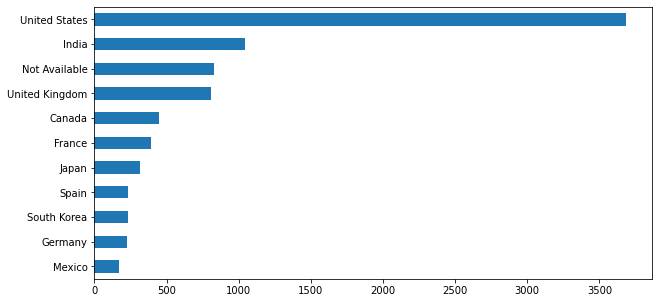

In [25]:
# Top 10
fig = plt.figure(figsize=(10,5))
country_df['COUNTRY'].value_counts()[:11].sort_values().plot(kind='barh');

## Most common genre

In [26]:
genre_df['LISTED_IN'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

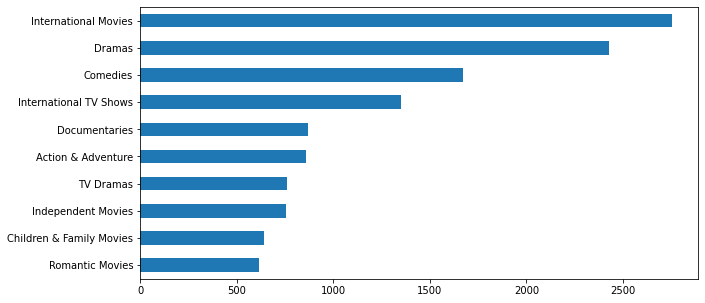

In [27]:
# Top 10
fig = plt.figure(figsize=(10,5))
genre_df['LISTED_IN'].value_counts()[:10].sort_values().plot(kind='barh');

## Most common rating

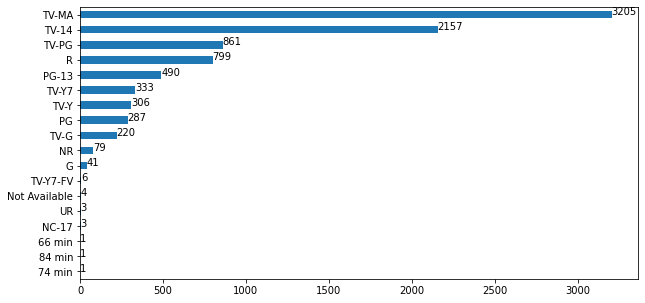

In [28]:
fig = plt.figure(figsize=(10,5))
netflix['rating'].value_counts().sort_values().plot(kind='barh')
for index, value in enumerate(netflix['rating'].value_counts().sort_values().values):
    plt.text(value, index, str(value));

## Duration distribution

In [29]:
netflix['duration'].value_counts()

1 Season     1793
2 Seasons     421
3 Seasons     198
90 min        152
97 min        146
             ... 
237 min         1
229 min         1
230 min         1
18 min          1
212 min         1
Name: duration, Length: 221, dtype: int64

In [30]:
season_duration = netflix['duration'][netflix['duration'].str.contains('Season')].value_counts()
season_duration

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
12 Seasons       2
15 Seasons       2
13 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

In [32]:
print(np.sum(season_duration.values, axis=0))
1793 / 2666

2666


0.672543135783946

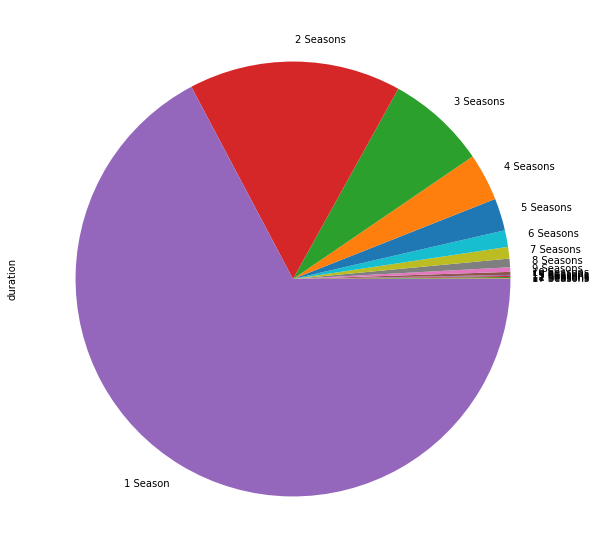

In [33]:
fig = plt.figure(figsize=(15,10))
season_duration.sort_values().plot(kind='pie');

In [38]:
time_duration = netflix['duration'][netflix['duration'].str.contains('min')].value_counts()
time_duration

90 min     152
97 min     146
94 min     146
93 min     146
91 min     144
          ... 
224 min      1
5 min        1
237 min      1
186 min      1
229 min      1
Name: duration, Length: 205, dtype: int64

## Persona
* Most common directors' persona?

In [39]:
def find_persona(director_name):
  actors =[]
  persona = pd.merge(director_df, cast_df, how='left', on='title')
  for actor in persona[persona['DIRECTOR'] == director_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [40]:
top10directors = director_df['DIRECTOR'].value_counts()[1:11].index.to_list()

In [41]:
for dic in top10directors:
  print('Director = ', dic) 
  print('Actors = ', find_persona(dic), sep='\n')
  print()

Director =  Rajiv Chilaka
Actors = 
Rajesh Kava          19
Julie Tejwani        19
Jigna Bhardwaj       18
Rupa Bhimani         18
Vatsal Dubey         16
Mousam               13
Swapnil              13
Mausam                2
Sanchit Wartak        2
Arun Shekher          2
Jigna Bharadhwaj      1
Sabina Malik          1
Sonal Kaushal         1
Vinod Kulkarni        1
Guru Shambu           1
Pooja Punabi          1
Chutki                1
Samriddhi Shuklaa     1
Parigna Pandya        1
Arun Shekar           1
Kaustav Ghosh         1
Vaibhav Thakkar       1
Aditya Raj Sharma     1
Anamaya Verma         1
dtype: int64

Director =  Jan Suter
Actors = 
Sofía Niño de Rivera           3
Carlos Ballarta                3
Ricardo O'Farrill              2
Natalia Valdebenito            1
Luciano Mellera                1
Manu NNa                       1
Raúl Meneses                   1
Chumel Torres                  1
Malena Pichot                  1
Sebastián Marcelo Wainraich    1
Ricardo Quev

## Most common genres per country

In [42]:
def find_popular_genre_cty(country_name):
  genres = []
  genre_country = pd.merge(country_df, genre_df, how='left', on='title')
  for genre in genre_country[genre_country['COUNTRY'] == country_name]['LISTED_IN'].values:
    if genre != 'Not Available':
      genres.append(genre)
  return pd.Series(genres).value_counts()

In [43]:
find_popular_genre_cty('United States')

Dramas                          835
Comedies                        680
Documentaries                   512
Action & Adventure              404
Children & Family Movies        390
Independent Movies              390
Thrillers                       292
TV Comedies                     253
TV Dramas                       232
Romantic Movies                 225
Stand-Up Comedy                 216
Kids' TV                        214
Horror Movies                   201
Docuseries                      191
Sci-Fi & Fantasy                181
International Movies            166
Music & Musicals                147
Crime TV Shows                  145
Reality TV                      123
Sports Movies                   113
TV Action & Adventure            93
Classic Movies                   81
International TV Shows           73
LGBTQ Movies                     63
TV Sci-Fi & Fantasy              59
Cult Movies                      52
TV Mysteries                     51
Science & Nature TV         

In [44]:
find_popular_genre_cty('South Korea')

International TV Shows          152
Korean TV Shows                 132
Romantic TV Shows                77
International Movies             44
TV Dramas                        38
Dramas                           26
Crime TV Shows                   24
TV Comedies                      19
Comedies                         17
Action & Adventure               17
Kids' TV                         16
Thrillers                        14
Children & Family Movies         10
TV Action & Adventure             9
Sci-Fi & Fantasy                  5
Horror Movies                     5
Stand-Up Comedy & Talk Shows      4
Reality TV                        4
TV Mysteries                      3
TV Horror                         3
Documentaries                     2
Independent Movies                2
Stand-Up Comedy                   2
Romantic Movies                   2
Cult Movies                       1
TV Thrillers                      1
Music & Musicals                  1
Movies                      

## Most common actors per country

In [45]:
def find_popular_actor_cty(country_name):
  actors = []
  actor_country = pd.merge(country_df, cast_df, how='left', on='title')
  for actor in actor_country[actor_country['COUNTRY'] == country_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [46]:
find_popular_actor_cty('United States')

Tara Strong                22
Samuel L. Jackson          22
Fred Tatasciore            21
Adam Sandler               20
James Franco               19
                           ..
Fabienne Piolini-Castle     1
Sylvia Earle                1
Steven Bognar               1
Jermaine Jacox              1
Linda Ballantyne            1
Length: 15083, dtype: int64

In [47]:
find_popular_actor_cty('South Korea')

Sung Dong-il             6
Kyeong-yeong Lee         5
Kim Won-hae              5
Park Shin-hye            5
Nam Joo-hyuk             5
                        ..
Josh Schwartzentruber    1
Kim Yong-geon            1
Jae-yun Jo               1
So-young Yoo             1
Terry Crews              1
Length: 1401, dtype: int64

## Most common directors per genre

In [48]:
def find_popular_director_gen(genre_name):
  directors = []
  director_genre = pd.merge(genre_df, director_df, how='left', on='title')
  for director in director_genre[director_genre['LISTED_IN'] == genre_name]['DIRECTOR'].values:
    if director != 'Not Available':
      directors.append(director)
  return pd.Series(directors).value_counts()

In [49]:
find_popular_director_gen('International Movies')

Cathy Garcia-Molina    13
Youssef Chahine        10
Yılmaz Erdoğan          9
Anurag Kashyap          8
Hakan Algül             8
                       ..
Onur Bilgetay           1
Chi Fat Chan            1
Agnidev Chatterjee      1
Elisa Fuksas            1
Anissa Bonnefont        1
Length: 2218, dtype: int64

## Most common actors per genre

In [50]:
def find_popular_actor_gen(genre_name):
  actors = []
  actor_genre = pd.merge(genre_df, cast_df, how='left', on='title')
  for actor in actor_genre[actor_genre['LISTED_IN'] == genre_name]['CAST'].values:
    if actor != 'Not Available':
      actors.append(actor)
  return pd.Series(actors).value_counts()

In [51]:
find_popular_actor_gen('International Movies')

Anupam Kher          38
Shah Rukh Khan       32
Naseeruddin Shah     27
Om Puri              27
Akshay Kumar         27
                     ..
Hoang Phuc Nguyen     1
Philippe Duquesne     1
Mahmoud Fares         1
Jung Won-joong        1
Ishita Dutta          1
Length: 13442, dtype: int64

## Most demanding actor, director in last 5 years

In [52]:
def col_data_parser2(col):
  netflix_cpy = netflix.copy()
  col_upper = col.upper()
  
  col_count = pd.concat([netflix_cpy, netflix[col].str.split(",", expand=True)], axis=1)
  
  col_count = col_count.melt(id_vars=['type', 'title', 'release_year'], 
                            value_vars=range(len(netflix[col].str.split(",", expand=True).columns)), 
                            value_name=col_upper)
  
  col_count = col_count[col_count[col_upper].notna()]
  col_count[col_upper] = col_count[col_upper].str.strip()
  col_count.drop(columns='variable', inplace=True)
  
  return col_count

In [53]:
year_director = col_data_parser2('director')
year_actor = col_data_parser2('cast')

In [59]:
year_director[year_director.release_year.isin([yr for yr in range(2017,2022)])]['DIRECTOR'].value_counts()[1:12]

Jan Suter              17
Raúl Campos            16
Marcus Raboy           14
Suhas Kadav            12
Justin G. Dyck          8
Fernando Ayllón         8
Prakash Satam           7
Jay Karas               7
Joey So                 6
Don Michael Paul        6
Cathy Garcia-Molina     6
Name: DIRECTOR, dtype: int64

In [60]:
year_actor[year_actor.release_year.isin([yr for yr in range(2017,2022)])]['CAST'].value_counts()[1:12]

Vincent Tong          21
Takahiro Sakurai      19
Andrea Libman         18
Fortune Feimster      18
Michela Luci          17
Yuki Kaji             16
Alessandro Juliani    15
David Spade           15
Toyin Abraham         15
Diana Kaarina         15
Grey Griffin          15
Name: CAST, dtype: int64